In [1]:
import numpy as np
import pickle 
import matplotlib.pyplot as plot
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd

ModuleNotFoundError: No module named 'numpy'

In [14]:
#get train data
with open('./data/train.pkl', 'rb') as train:
    data1 = pickle.load(train)
    
#shuffle data everytime to get diff models
np.random.shuffle(data1)

#getting x and y coordinates separately
x_tr=data1[:,:-1]
y_tr=data1[:,1]

#get test data
with open('./data/test.pkl','rb') as test:
    data2 = pickle.load(test)
x_test=data2[:,:-1]
y_test=data2[:,1]
#print(y_test)
#split train data into 10 sets
x_train=np.array(np.array_split(x_tr,10))
y_train=np.array(np.array_split(y_tr,10))

In [15]:
bias=np.zeros(21)
biassq=np.zeros(21)
variance=np.zeros(21)
degree=np.zeros(21)
irred_error=np.zeros(21)
tot_err = np.zeros(21)

In [16]:
reg = LinearRegression()

#for each degree run fit on 10 models,800 data points each,pass test data and get output
for i in range(1,21): 
    difference = np.zeros((10,80))
    temp=np.zeros(80)
    #create output array to get predicted values
    y_return=np.zeros((10,80)) 
    for j in range(10):
        polynomial = PolynomialFeatures(degree=i , include_bias=False)
        
        X_TRAIN = polynomial.fit_transform(x_train[j])
        X_TEST = polynomial.fit_transform(x_test)
        
        reg.fit(X_TRAIN , y_train[j])
        
        prediction = []
        prediction = (reg.predict(X_TEST))
        y_return[j]=prediction
        difference[j] = ((y_test - y_return[j])**2)
    
    #getting average mse
    for j in range (10):
        temp += difference[j]
    temp /= 10
    tot_err[i] = np.mean(temp)
    
    #for each degree ,calculate bias
    y_mean=np.mean(y_return,axis=0)
    bias[i]=np.mean(abs(y_mean - y_test))
    biassq[i] = np.mean((y_mean - y_test)**2)
    
    # for each degree , calculate variance
    y_var=np.var(y_return,axis=0)
    variance[i]=np.mean(y_var)
   
    
    #calculate irreducible error
    irred_error[i]=np.mean(temp) - (biassq[i] +variance[i]) 
    

In [17]:
bias[0]=None
biassq[0]=None
variance[0]=None
irred_error[0]=None    
tot_err[0]=None
table_bias=pd.DataFrame({'Degree':np.array(range(0,21)),'Bias':bias,'Variance': variance, \
                          'irreducible error': irred_error})
print(table_bias.to_string(index=False))

 Degree        Bias       Variance  irreducible error
      0         NaN            NaN                NaN
      1  820.268221   46446.687158       0.000000e+00
      2  811.612270   58673.448148       1.164153e-10
      3   66.123389   63725.028011       0.000000e+00
      4   74.225810   77405.090757       1.455192e-11
      5   72.289218  104279.898978       2.910383e-11
      6   72.985829  133633.620068       0.000000e+00
      7   70.865258  160916.911216       0.000000e+00
      8   73.595119  176260.947225       2.910383e-11
      9   76.803975  214270.204269       0.000000e+00
     10   83.318402  176937.909389       2.910383e-11
     11   77.791108  200060.055803       0.000000e+00
     12  123.318795  212272.016579       8.731149e-11
     13   78.935074  197754.158486       0.000000e+00
     14  123.679830  174268.786292       2.910383e-11
     15  160.250865  185166.879253       0.000000e+00
     16  165.660688  200859.646673       5.820766e-11
     17  240.329606  218781.

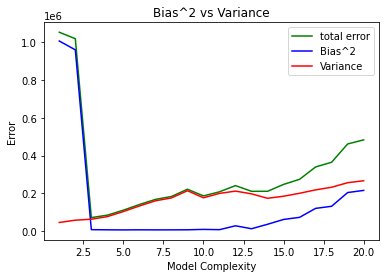

In [21]:
plot.xlabel('Model Complexity') 
plot.ylabel('Error') 
plot.title("Bias^2 vs Variance") 
#plotting the graph og bias square and variance
plot.plot(tot_err,label='total error', color = 'green')
# plot.plot(bias**2,label='Bias^2', color = 'blue')
plot.plot(biassq,label='Bias^2', color = 'blue')
plot.plot(variance,label='Variance', color = 'red')

plot.legend()